<a href="https://colab.research.google.com/github/manasik29/Neural-Networks/blob/main/lenet%2Calex_and_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
import tensorflow as tf

# LENET

In [2]:
model = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5),name="conv1",activation="relu",input_shape=(32,32,1)),  
  tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2),
  tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5),name="conv2",activation="relu") , 
  tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2) ,
  tf.keras.layers.Flatten(),
  
  
  tf.keras.layers.Dense(120,name="dense1",activation="relu"),
  tf.keras.layers.Dense(84,name="dense2",activation="relu"),
  tf.keras.layers.Dense(10,name="dense3",activation="softmax"),

  
  
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2 (Conv2D)              (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense1 (Dense)              (None, 120)               4

# ALEXNET

In [4]:
model = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11),name="conv1",activation="relu",strides=4,input_shape=(227,227,3)),  
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=2),
  tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5),name="conv2",activation="relu",padding="same") , 
  tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2) ,
  tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3),name="conv3",activation="relu",padding="same") , 
  tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3),name="conv4",activation="relu",padding="same") , 
  tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),name="conv5",activation="relu",padding="same") , 
  tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2),  

  
  tf.keras.layers.Flatten(),
  
  
  
  tf.keras.layers.Dense(4096,name="dense1",activation="relu"),
  tf.keras.layers.Dense(4096,name="dense2",activation="relu"),
  tf.keras.layers.Dense(1000,name="output",activation="softmax")  

  
  
])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 13, 13, 384)       885120    
                                                                 
 conv4 (Conv2D)              (None, 13, 13, 384)      

In [6]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, Flatten,\
# Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization

model = tf.keras.models.Sequential()
# 1st Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
strides=(4,4), padding='valid'))
model.add(tf.keras.layers.Activation('relu'))
# Pooling 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(tf.keras.layers.BatchNormalization())
# 2nd Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
# Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 3rd Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 4th Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 5th Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
# Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# Passing it to a dense layer
model.add(tf.keras.layers.Flatten())
# 1st Dense Layer
model.add(tf.keras.layers.Dense(4096, input_shape=(224*224*3,)))
model.add(tf.keras.layers.Activation('relu'))
# Add Dropout to prevent overfitting
model.add(tf.keras.layers.Dropout(0.4))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 2nd Dense Layer
model.add(tf.keras.layers.Dense(4096))
model.add(tf.keras.layers.Activation('relu'))
# Add Dropout
model.add(tf.keras.layers.Dropout(0.4))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 3rd Dense Layer
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Activation('relu'))
# Add Dropout
model.add(tf.keras.layers.Dropout(0.4))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# Output Layer
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)      

# VGGNET

In [7]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input

In [8]:
model = VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 3s 0us/step


In [9]:
model = Model(inputs=model.input, outputs=model.outputs)

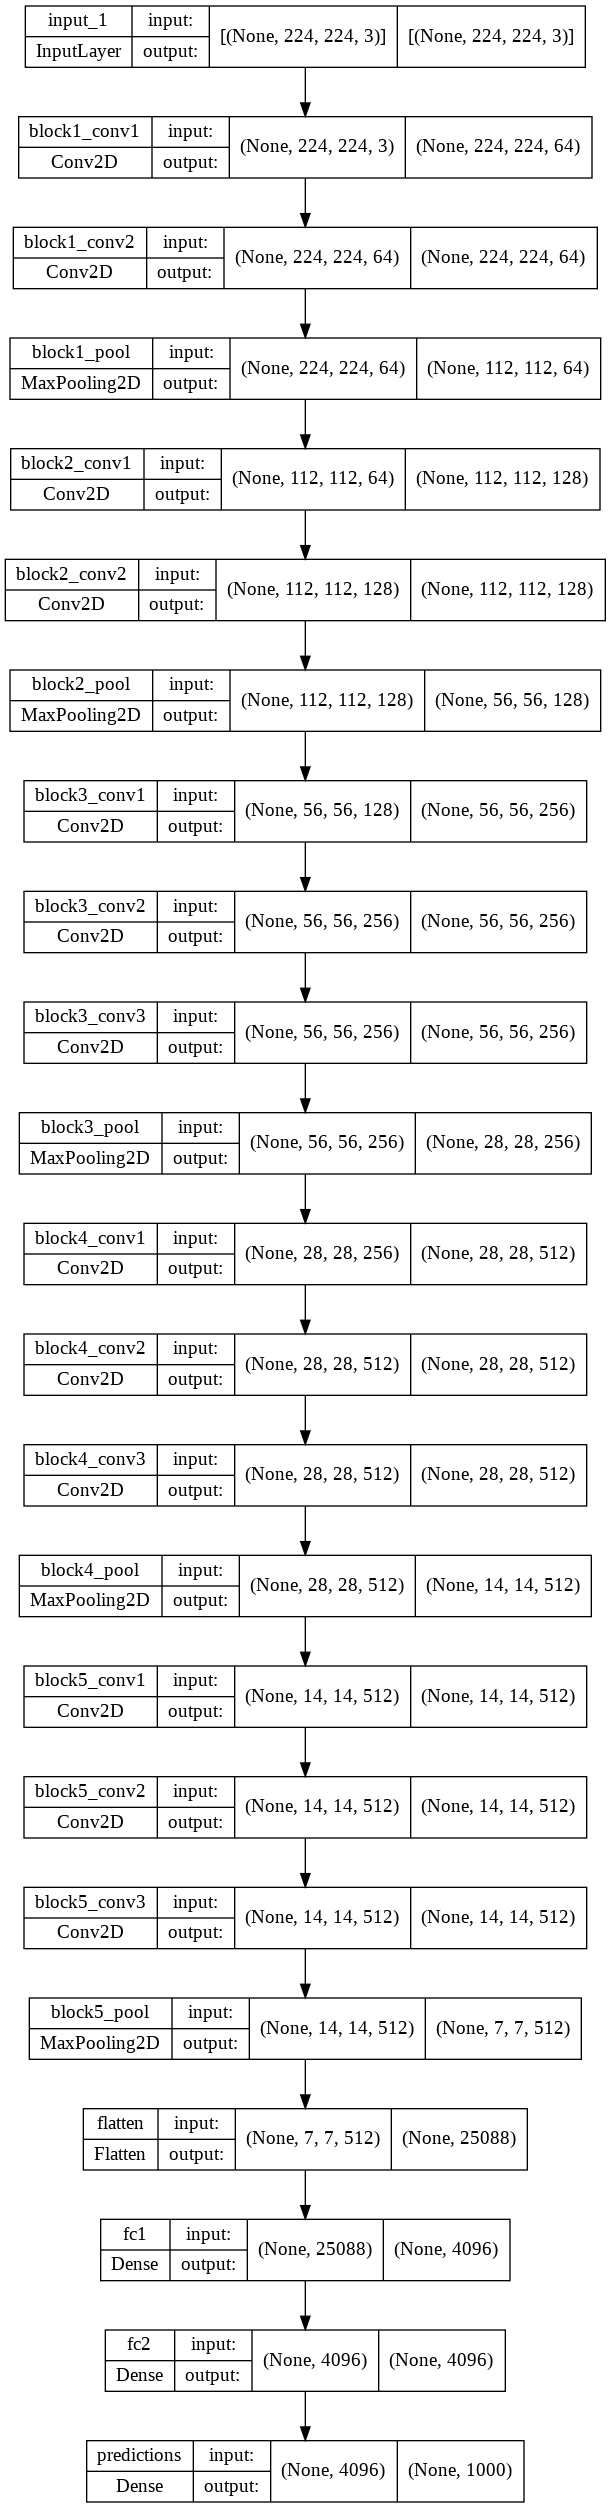

In [10]:
tf.keras.utils.plot_model(model, "VGG16.png", show_shapes=True)

In [13]:
img_path = '/content/10005.jpg'
img = image.load_img(img_path, target_size=(224, 224))# this should match with the model input size 
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)

In [14]:
pred

array([[5.79407060e-06, 9.02742670e-07, 7.42651355e-06, 3.94221752e-06,
        4.06531308e-06, 3.43619809e-06, 8.96555503e-06, 2.08254596e-06,
        1.63279401e-06, 9.82490837e-06, 2.32780553e-06, 8.47014519e-07,
        9.80159029e-07, 5.44003660e-06, 1.68152496e-06, 3.95240795e-06,
        2.48782180e-06, 4.34702270e-06, 1.02120603e-05, 1.53973770e-06,
        1.30754517e-04, 8.57847226e-06, 4.43218705e-05, 4.68553881e-05,
        2.73078012e-06, 9.32515650e-06, 1.57913746e-06, 8.39162749e-06,
        2.85756460e-06, 9.28598013e-07, 5.82800294e-06, 4.10142178e-07,
        7.30949694e-07, 1.47497913e-05, 4.35577276e-05, 1.56549759e-05,
        1.25031665e-05, 1.12449015e-06, 1.15050477e-06, 1.28503434e-05,
        9.88706120e-07, 7.48394257e-07, 7.96451604e-06, 9.09902781e-07,
        1.97476720e-06, 1.78571590e-05, 1.53884378e-06, 1.63399977e-06,
        3.22357300e-06, 3.45403828e-06, 6.49659933e-06, 9.32160037e-06,
        1.03004959e-06, 7.98895314e-07, 1.96672886e-06, 9.691067

In [15]:
P=imagenet_utils.decode_predictions(pred)

49152/35363 [=========================================] - 0s 0us/step


In [16]:
P

[[('n09468604', 'valley', 0.82328176),
  ('n09193705', 'alp', 0.08841124),
  ('n03792972', 'mountain_tent', 0.020744113),
  ('n09246464', 'cliff', 0.014566897),
  ('n09399592', 'promontory', 0.010996175)]]

# inception 

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [18]:
model = InceptionV3(weights='imagenet', include_top=True)

96124928/96112376 [==============================] - 1s 0us/step


In [19]:
model = Model(inputs=model.input, outputs=model.outputs)

In [20]:
tf.keras.utils.plot_model(model, "inception_.png", show_shapes=True)

In [22]:
img_path = '/content/10005.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x)

In [23]:
P=imagenet_utils.decode_predictions(pred)

In [24]:
P

[[('n09468604', 'valley', 0.52657354),
  ('n09193705', 'alp', 0.19333594),
  ('n03792972', 'mountain_tent', 0.046546128),
  ('n09332890', 'lakeside', 0.0065218406),
  ('n04326547', 'stone_wall', 0.005150123)]]

# RES NET

In [25]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [26]:
model = ResNet50(weights='imagenet',include_top=True)

102981632/102967424 [==============================] - 1s 0us/step


In [27]:
model = Model(inputs=model.input, outputs=model.outputs)

In [28]:
img_path = '/content/10005.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)

In [29]:
P=imagenet_utils.decode_predictions(pred)

In [30]:
P

[[('n09468604', 'valley', 0.7434898),
  ('n09193705', 'alp', 0.08464179),
  ('n03792972', 'mountain_tent', 0.03955487),
  ('n09332890', 'lakeside', 0.033218447),
  ('n09288635', 'geyser', 0.015849743)]]

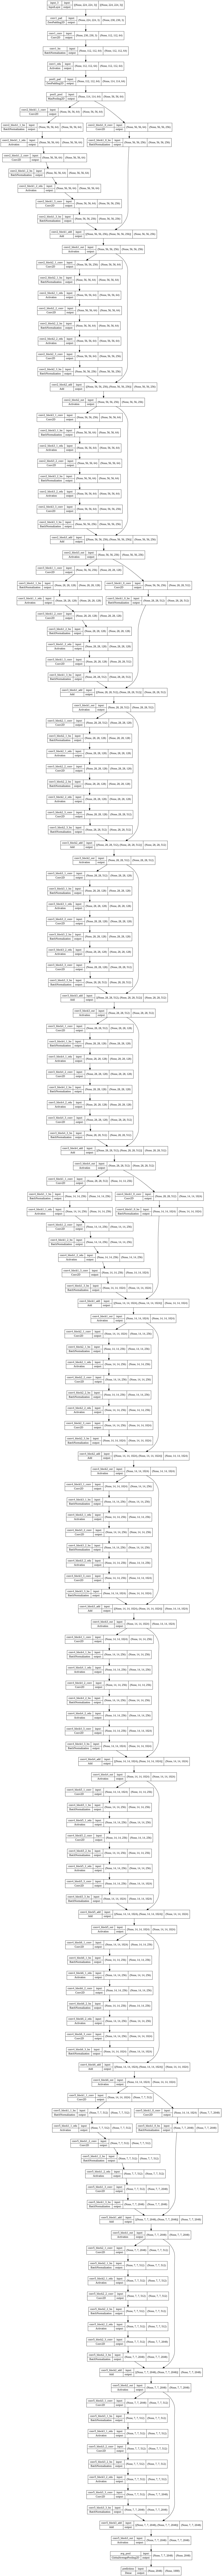

In [31]:
tf.keras.utils.plot_model(model, "renet50.png", show_shapes=True)